In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [52]:
N = 10000
alpha = 2.3
sigma = 2.
slope = 4.
x = np.random.normal (size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

data = {
    'x':x,
    'N':N,
    'y':y
}

In [53]:
program_code = """
data {
  int<lower=1> N;           // Number of observations
  vector[N] x;              // Covariate
  vector[N] y;              // Outcome
}
parameters {
  real alpha;               // Intercept
  real beta;                // Slope
  real<lower=0> sigma;      // Noise
}
model {
  // Priors
  alpha ~ normal(0, 10);
  beta ~ normal(0, 10);
  sigma ~ inv_gamma(1, 1);

  // Likelihood
  for (n in 2:N)
    y[n] ~ normal(alpha + beta * x[n], sigma);
}

"""

In [54]:
model = stan.build(program_code,data)
fit = model.sample(num_chains=3,num_warmup=1000,num_samples=2500)

Building...


Building: 9.4s, done.Sampling:   0%
Sampling:   0% (1/10500)
Sampling:   0% (2/10500)
Sampling:   0% (3/10500)
Sampling:   1% (102/10500)
Sampling:   2% (201/10500)
Sampling:   3% (300/10500)
Sampling:   4% (400/10500)
Sampling:   5% (500/10500)
Sampling:   6% (600/10500)
Sampling:   7% (700/10500)
Sampling:   8% (800/10500)
Sampling:   9% (900/10500)
Sampling:  10% (1000/10500)
Sampling:  10% (1100/10500)
Sampling:  11% (1200/10500)
Sampling:  12% (1300/10500)
Sampling:  13% (1400/10500)
Sampling:  14% (1500/10500)
Sampling:  15% (1600/10500)
Sampling:  16% (1700/10500)
Sampling:  17% (1800/10500)
Sampling:  18% (1900/10500)
Sampling:  19% (2000/10500)
Sampling:  20% (2100/10500)
Sampling:  21% (2200/10500)
Sampling:  22% (2300/10500)
Sampling:  23% (2400/10500)
Sampling:  24% (2500/10500)
Sampling:  25% (2600/10500)
Sampling:  26% (2700/10500)
Sampling:  50% (5300/10500)
Sampling:  75% (7900/10500)
Sampling: 100% (10500/10500)
Sampling: 100% (10500/10500), done.
Messages received du

In [55]:
df = fit.to_frame()
df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma
draws,,,,,,,,,,
0,-11956.596244,0.989483,0.755434,3.0,7.0,0.0,11958.657290,2.278286,3.971910,2.009089
1,-11957.250973,0.981951,0.805017,2.0,3.0,0.0,11957.518406,2.292243,3.976065,2.026019
2,-11958.179322,0.983443,0.813274,3.0,7.0,0.0,11958.555258,2.332042,3.981847,2.020114
3,-11957.975621,0.857264,0.755434,2.0,3.0,0.0,11958.736713,2.270762,3.955392,2.024108
4,-11960.275341,0.782229,0.805017,2.0,3.0,0.0,11960.831606,2.341468,3.978838,1.978160


In [56]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.299,0.020,2.261,2.336,0.0,0.0,7065.0,5867.0,1.0
beta,3.965,0.020,3.928,4.003,0.0,0.0,6906.0,5768.0,1.0
sigma,2.005,0.014,1.977,2.030,0.0,0.0,8644.0,6119.0,1.0


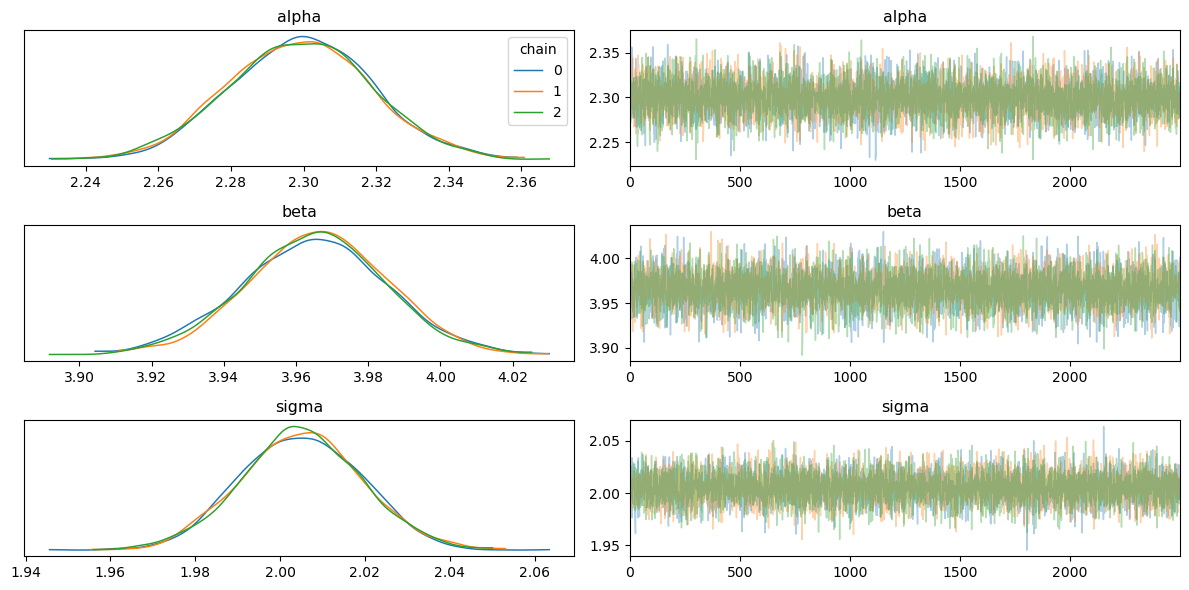

In [57]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()